In [1]:
from IPython.core.display import display, HTML
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import pandas as pd 
import numpy as np
import requests
import folium
import re
mpl.style.use('ggplot') 

# Problem

In Bogotá, Colombia in the last few years several restaurants of all kinds have been opened, in this case, there is a minimal group that prepares healthy food and the number of people interested in healthy food is also growing, for this reason, the stakeholders will want to know which it's the best place for starting their business.

# Interest
The parts interest are restaurant chains which it will want to open a new restaurant for fit people, people that workout or simply people interested in healthy food.

# Latitide and longitude

In [2]:
CLIENT_ID = 'GXNK2FP3DRI20BD2U5GK0WFUT1FFXSRROFF2BBLUIV0BHJFQ' # your Foursquare ID
CLIENT_SECRET = 'LF4HRWWUECTJO3WU3QB5MUCP3V4S0YKGTUI21YHV4F4BZX1N' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50 # A default Foursquare API limit value

Find coordinates of Bogotá

In [3]:
address = 'Bogota, Colombia'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_bogota = location.latitude
longitude_bogota = location.longitude
print('Latitude and longitude values of {} are {}, {}.'.format(address, latitude_bogota, longitude_bogota))

Latitude and longitude values of Bogota, Colombia are 4.6533326, -74.083652.


Get some columns impotant in data "indicadores-por-localidades-de-bogota-1999-2015.csv" for year 2015

In [4]:
bogota_indicator_df=pd.read_csv('csv/indicadores-por-localidades-de-bogota-1999-2015.csv', delimiter=';') 
bogota_df_info =  bogota_indicator_df[bogota_indicator_df['Anio'] == 2015.0]
bogota_df_info = bogota_df_info[['Código Localidad', 'Localidad', 'Población Total', 'Población Hombres', 'Población Mujeres', 'Extensión territorial área km2 (area urbana)', 'Extensión territorial área km2 (total)', 'Geometry']]
bogota_df_info.head()

,Código Localidad,Localidad,Población Total,Población Hombres,Población Mujeres,Extensión territorial área km2 (area urbana),Extensión territorial área km2 (total),Geometry
10,1.0,Usaquén,494066.0,229094.0,264972.0,38.07,65.32,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-7..."
16,2.0,Chapinero,137870.0,64685.0,73185.0,16.16,38.16,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-7..."
27,4.0,San Cristóbal,406025.0,198396.0,207629.0,16.48,49.10,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-7..."
43,6.0,Tunjuelito,200048.0,99269.0,100779.0,9.91,9.91,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-7..."
54,7.0,Bosa,646833.0,316343.0,330490.0,23.93,23.93,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-7..."


Show some neighborhoods 

In [5]:
map_newyork = folium.Map(location=[latitude_bogota, longitude_bogota], zoom_start=11.5)
list_geometry = bogota_df_info["Geometry"].tolist()
folium.GeoJson(data=list_geometry[3]).add_to(map_newyork)
#map_newyork = folium.Map(location=[latitude_bogota, longitude_bogota], zoom_start=11.5)
for neighborhood, geometry in zip(bogota_df_info['Localidad'], list_geometry):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    try:
        folium.GeoJson(data=geometry).add_to(map_newyork)
    except:
        print("Error JSON "+neighborhood) 

map_newyork

Error JSON Chapinero
Error JSON San Cristóbal
Error JSON la Candelaria
Error JSON Ciudad Bolívar


Show the dataFrame of the latitude and longitude foreach neighborhood (in this case "LOCALIDAD")

In [6]:
bogota_df=pd.read_csv('csv/georeferencia-puntual-por-localidad.csv', delimiter=',') 
bogota_df = pd.merge(bogota_df,
        bogota_df_info,
        left_on = 'CODIGO',
        right_on = 'Código Localidad',
        how='left'
        )
bogota_df = bogota_df[['NeighborhoodBogota', 'Latitude', 'Longitude', 'Código Localidad', 'Localidad', 'Población Total', 'Población Hombres', 'Población Mujeres', 'Extensión territorial área km2 (area urbana)']]
bogota_df

,NeighborhoodBogota,Latitude,Longitude,Código Localidad,Localidad,Población Total,Población Hombres,Población Mujeres,Extensión territorial área km2 (area urbana)
0,CHAPINERO,4.656900,-74.046700,2.0,Chapinero,137870.0,64685.0,73185.0,16.16
1,TUNJUELITO,4.587500,-74.140700,6.0,Tunjuelito,200048.0,99269.0,100779.0,9.91
2,ANTONIO NARIÑO,4.589768,-74.099060,15.0,Antonio Nariño,108941.0,53103.0,55838.0,4.88
3,PUENTE ARANDA,4.614900,-74.122700,16.0,Puente Aranda,258414.0,127204.0,131210.0,17.31
4,USAQUÉN,4.730458,-74.035666,1.0,Usaquén,494066.0,229094.0,264972.0,38.07
5,BOGOTÁ,4.644584,-74.065630,NaN,NaN,NaN,NaN,NaN,NaN
6,BOSA,4.630500,-74.194500,7.0,Bosa,646833.0,316343.0,330490.0,23.93
7,CIUDAD BOLÍVAR,4.556728,-74.149655,19.0,Ciudad Bolívar,687923.0,336796.0,351127.0,33.92
8,RAFAEL URIBE URIBE,4.565300,-74.116400,18.0,Rafael Uribe Uribe,375107.0,184837.0,190270.0,17.28
9,KENNEDY,4.626800,-74.157300,8.0,Kennedy,1069469.0,521766.0,547703.0,38.57


The next function will show the neighborhoods in the map with a radius 3000m besibdes this radius will be importat for venues for foursquare

In [7]:
default_radius = 3000
map_newyork = folium.Map(location=[latitude_bogota, longitude_bogota], zoom_start=11.5)
for lat, lng, neighborhood in zip(bogota_df['Latitude'], bogota_df['Longitude'], bogota_df['NeighborhoodBogota']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)
    folium.Circle([lat, lng],
                    radius=default_radius
                   ).add_to(map_newyork)
map_newyork

# Analysis each neighborhood

The next function will find venues in a radius of 3000m

In [8]:
def get_near_by_venues(names, latitudes, longitudes, radius=3000):
    venues_list=list()
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results
        ])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['NeighborhoodBogota', 'Neighborhood Latitude', 'Neighborhood Longitude',
                              'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [9]:
bogota_venues = get_near_by_venues(names=bogota_df['NeighborhoodBogota'],
                                   latitudes=bogota_df['Latitude'],
                                   longitudes=bogota_df['Longitude'],
                                   radius=default_radius
                                  )

We show venues foreach Neighborhood

In [10]:
bogota_venues.head()

,NeighborhoodBogota,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CHAPINERO,4.6569,-74.0467,Bandido Bistro,4.661514,-74.050307,French Restaurant
1,CHAPINERO,4.6569,-74.0467,Quebrada La Vieja,4.650833,-74.049511,Scenic Lookout
2,CHAPINERO,4.6569,-74.0467,El Caracol Azul,4.656121,-74.053203,Peruvian Restaurant
3,CHAPINERO,4.6569,-74.0467,Harry Sasson,4.659021,-74.054525,Restaurant
4,CHAPINERO,4.6569,-74.0467,Brot Bakery & Cafe,4.663257,-74.050578,Bakery


We should find places that it is related for example restaurants and gym, therefore studying the dataframe we can conclude that categories more important in this case are

In [11]:
categories = ['Restaurant', 'Gym', 'Shopping Mall']
expression_regular = ['^(|(.+))((R|r)estaurant)(|(.+))?', '^(|(.+))(Gym)(|(.+))?', 'Shopping Mall']
df_categories = bogota_df[['NeighborhoodBogota']]
for category, regex in zip(categories, expression_regular):
    venues_category = bogota_venues[bogota_venues['Venue Category'].str.match(regex)== True]
    group_count = venues_category.groupby(['NeighborhoodBogota']).agg(
                {'NeighborhoodBogota': lambda x: x.count()
            })
    group_count.columns  = [''+category]
    group_count.reset_index()
    df_categories = pd.merge(df_categories,
                 group_count,
                 on='NeighborhoodBogota', 
                 how='left'
            )    
df_categories.replace(np.nan,0, inplace=True)
df_categories.head()

,NeighborhoodBogota,Restaurant,Gym,Shopping Mall
0,CHAPINERO,14.0,1.0,1.0
1,TUNJUELITO,11.0,1.0,1.0
2,ANTONIO NARIÑO,10.0,2.0,0.0
3,PUENTE ARANDA,18.0,1.0,1.0
4,USAQUÉN,9.0,2.0,0.0


Plotting number of Restaurant, Gym and Shopping Mall

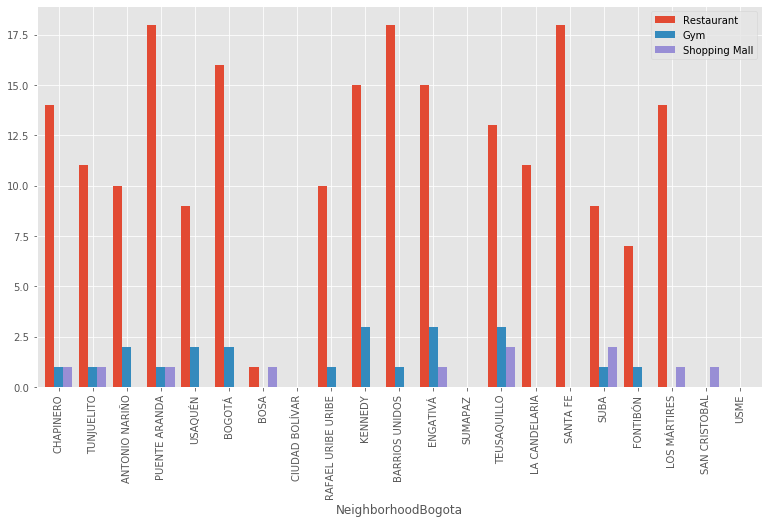

In [12]:
plot_data = df_categories
plot_data.plot(kind='bar', x='NeighborhoodBogota', width=0.8, figsize=(13, 7))
x = plot_data.transpose().values #returns a numpy array


Plotting population for each Neighborhood

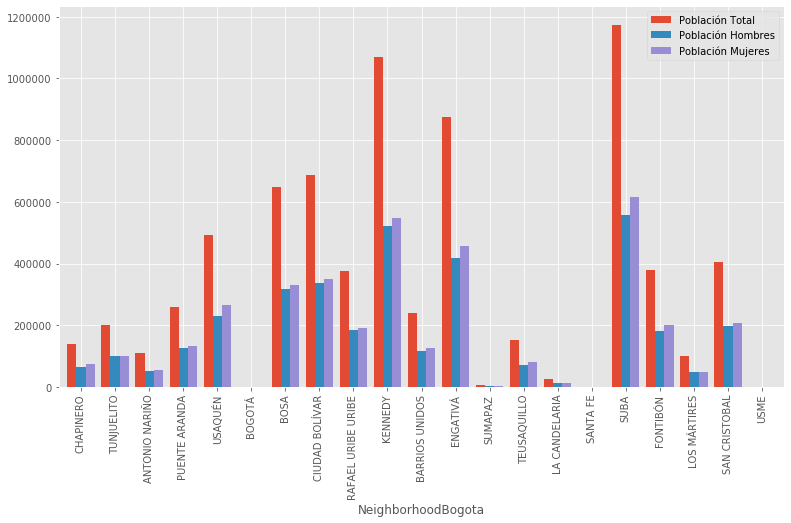

In [13]:
plot_data = bogota_df[['NeighborhoodBogota', 'Población Total', 'Población Hombres','Población Mujeres']]
plot_data.plot(kind='bar', x='NeighborhoodBogota', width=0.8, figsize=(13, 7))
x = plot_data.transpose().values #returns a numpy array

Finally, extensions of neighborhoods (km²)

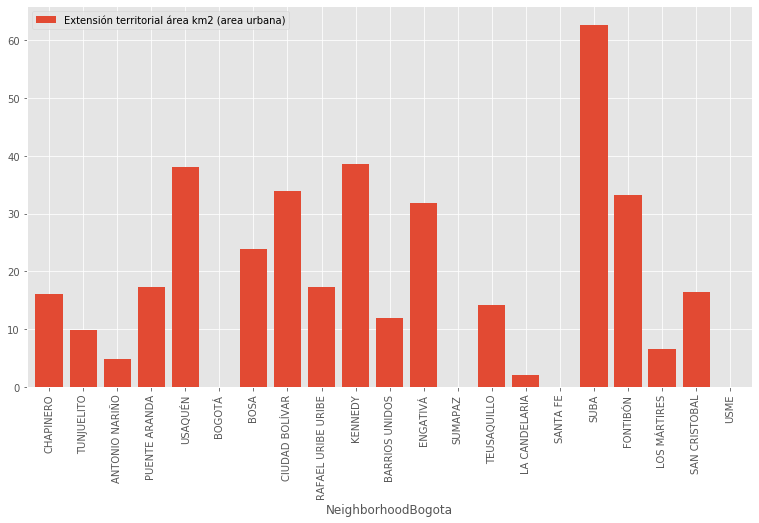

In [14]:
plot_data = bogota_df[['NeighborhoodBogota','Extensión territorial área km2 (area urbana)']]
plot_data.plot(kind='bar', x='NeighborhoodBogota', width=0.8, figsize=(13, 7))
x = plot_data.transpose().values #returns a numpy array

# Clustering

In [15]:
bogota_one = pd.get_dummies(bogota_venues[['Venue Category']], prefix="", prefix_sep="")
bogota_one['NeighborhoodBogota'] = bogota_venues['NeighborhoodBogota'] 

In [16]:
bogota_grouped = bogota_one.groupby('NeighborhoodBogota').mean().reset_index()

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

we find the most frequent places for each neighborhood

In [18]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['NeighborhoodBogota']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['NeighborhoodBogota'] = bogota_grouped['NeighborhoodBogota']
for ind in np.arange(bogota_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,NeighborhoodBogota,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANTONIO NARIÑO,Pizza Place,Park,Seafood Restaurant,Café,Burger Joint,Fried Chicken Joint,Sandwich Place,Art Museum,Restaurant,Pie Shop
1,BARRIOS UNIDOS,Restaurant,Bakery,Seafood Restaurant,Italian Restaurant,German Restaurant,French Restaurant,Asian Restaurant,Latin American Restaurant,Gym,Coffee Shop
2,BOGOTÁ,Coffee Shop,Hotel,Italian Restaurant,Bookstore,Restaurant,Bakery,Pizza Place,Café,Vegetarian / Vegan Restaurant,Cupcake Shop
3,BOSA,Movie Theater,Department Store,Grocery Store,Park,Restaurant,Athletics & Sports,Shopping Mall,Nightclub,Optical Shop,Outdoors & Recreation
4,CHAPINERO,Bakery,Hotel,Coffee Shop,Latin American Restaurant,Restaurant,Italian Restaurant,Café,Bookstore,French Restaurant,Burger Joint


# K-means

In [19]:
kclusters = 7
bogota_grouped_clustering = bogota_grouped.drop('NeighborhoodBogota', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_grouped_clustering)

In [20]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bogota_merged = bogota_df
bogota_merged = bogota_merged.join(neighborhoods_venues_sorted.set_index('NeighborhoodBogota'), on='NeighborhoodBogota')
bogota_merged.head() # check the last columns!
#bogota_merged.dropna(inplace=True)

,NeighborhoodBogota,Latitude,Longitude,Código Localidad,Localidad,Población Total,Población Hombres,Población Mujeres,Extensión territorial área km2 (area urbana),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHAPINERO,4.656900,-74.046700,2.0,Chapinero,137870.0,64685.0,73185.0,16.16,3,Bakery,Hotel,Coffee Shop,Latin American Restaurant,Restaurant,Italian Restaurant,Café,Bookstore,French Restaurant,Burger Joint
1,TUNJUELITO,4.587500,-74.140700,6.0,Tunjuelito,200048.0,99269.0,100779.0,9.91,0,Park,Bar,Pizza Place,Fast Food Restaurant,Burger Joint,Fried Chicken Joint,Pharmacy,Sandwich Place,Cajun / Creole Restaurant,Sporting Goods Shop
2,ANTONIO NARIÑO,4.589768,-74.099060,15.0,Antonio Nariño,108941.0,53103.0,55838.0,4.88,0,Pizza Place,Park,Seafood Restaurant,Café,Burger Joint,Fried Chicken Joint,Sandwich Place,Art Museum,Restaurant,Pie Shop
3,PUENTE ARANDA,4.614900,-74.122700,16.0,Puente Aranda,258414.0,127204.0,131210.0,17.31,0,Burger Joint,Restaurant,Mexican Restaurant,Seafood Restaurant,Japanese Restaurant,French Restaurant,Creperie,Sandwich Place,BBQ Joint,South American Restaurant
4,USAQUÉN,4.730458,-74.035666,1.0,Usaquén,494066.0,229094.0,264972.0,38.07,0,Park,Supermarket,Brewery,Dessert Shop,Ice Cream Shop,Coffee Shop,Restaurant,Bakery,Burger Joint,Mexican Restaurant


In [21]:
map_clusters = folium.Map(location=[latitude_bogota, longitude_bogota], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bogota_merged['Latitude'], bogota_merged['Longitude'], bogota_merged['NeighborhoodBogota'], bogota_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

<img src='../images/png/clustering3.png'>

In [22]:
for i in range(0, kclusters):
    cluster = bogota_merged.loc[bogota_merged['Cluster Labels'] == i]
    display(HTML('<h1>Cluster '+str(i+1)+'</h1>'))
    cluster_df = pd.merge(cluster,
        df_categories,
        on='NeighborhoodBogota'
        )[['NeighborhoodBogota', 'Cluster Labels', 'Población Total', 'Restaurant', 'Gym' ,'Shopping Mall', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue']]
    display(cluster_df)
    
    


,NeighborhoodBogota,Cluster Labels,Población Total,Restaurant,Gym,Shopping Mall,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,TUNJUELITO,0,200048.0,11.0,1.0,1.0,Park,Bar,Pizza Place,Fast Food Restaurant,Burger Joint,Fried Chicken Joint,Pharmacy
1,ANTONIO NARIÑO,0,108941.0,10.0,2.0,0.0,Pizza Place,Park,Seafood Restaurant,Café,Burger Joint,Fried Chicken Joint,Sandwich Place
2,PUENTE ARANDA,0,258414.0,18.0,1.0,1.0,Burger Joint,Restaurant,Mexican Restaurant,Seafood Restaurant,Japanese Restaurant,French Restaurant,Creperie
3,USAQUÉN,0,494066.0,9.0,2.0,0.0,Park,Supermarket,Brewery,Dessert Shop,Ice Cream Shop,Coffee Shop,Restaurant
4,RAFAEL URIBE URIBE,0,375107.0,10.0,1.0,0.0,BBQ Joint,Fast Food Restaurant,Seafood Restaurant,Sandwich Place,Park,Mexican Restaurant,Burger Joint
5,KENNEDY,0,1069469.0,15.0,3.0,0.0,Fast Food Restaurant,BBQ Joint,Burger Joint,Gym,Park,Hot Dog Joint,Coffee Shop
6,ENGATIVÁ,0,874755.0,15.0,3.0,1.0,Fast Food Restaurant,Restaurant,Ice Cream Shop,Bakery,Gym,Mexican Restaurant,Clothing Store
7,SUBA,0,1174736.0,9.0,1.0,2.0,Fast Food Restaurant,Pharmacy,Coffee Shop,Bar,Creperie,Shopping Mall,Asian Restaurant


,NeighborhoodBogota,Cluster Labels,Población Total,Restaurant,Gym,Shopping Mall,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,SUMAPAZ,1,6460.0,0.0,0.0,0.0,Park,Airport,Multiplex,Neighborhood,Nightclub,Optical Shop,Outdoors & Recreation


,NeighborhoodBogota,Cluster Labels,Población Total,Restaurant,Gym,Shopping Mall,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,CIUDAD BOLÍVAR,2,687923.0,0.0,0.0,0.0,Park,Movie Theater,Burger Joint,Peruvian Restaurant,Neighborhood,Nightclub,Optical Shop


,NeighborhoodBogota,Cluster Labels,Población Total,Restaurant,Gym,Shopping Mall,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,CHAPINERO,3,137870.0,14.0,1.0,1.0,Bakery,Hotel,Coffee Shop,Latin American Restaurant,Restaurant,Italian Restaurant,Café
1,BOGOTÁ,3,NaN,16.0,2.0,0.0,Coffee Shop,Hotel,Italian Restaurant,Bookstore,Restaurant,Bakery,Pizza Place
2,BARRIOS UNIDOS,3,240960.0,18.0,1.0,0.0,Restaurant,Bakery,Seafood Restaurant,Italian Restaurant,German Restaurant,French Restaurant,Asian Restaurant
3,TEUSAQUILLO,3,151092.0,13.0,3.0,2.0,Hotel,Bakery,French Restaurant,Latin American Restaurant,Restaurant,Bowling Alley,Multiplex
4,LA CANDELARIA,3,24096.0,11.0,0.0,0.0,Café,History Museum,Nightclub,Bookstore,BBQ Joint,Coffee Shop,Caribbean Restaurant
5,SANTA FE,3,NaN,18.0,0.0,0.0,Restaurant,Café,History Museum,Coffee Shop,Italian Restaurant,Park,Theater
6,FONTIBÓN,3,380453.0,7.0,1.0,0.0,Café,Coffee Shop,Airport Lounge,Hotel,Pizza Place,Ice Cream Shop,BBQ Joint
7,LOS MÁRTIRES,3,98758.0,14.0,0.0,1.0,Café,Restaurant,Latin American Restaurant,Theater,History Museum,Bakery,Art Museum


,NeighborhoodBogota,Cluster Labels,Población Total,Restaurant,Gym,Shopping Mall,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,BOSA,4,646833.0,1.0,0.0,1.0,Movie Theater,Department Store,Grocery Store,Park,Restaurant,Athletics & Sports,Shopping Mall


,NeighborhoodBogota,Cluster Labels,Población Total,Restaurant,Gym,Shopping Mall,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,USME,5,NaN,0.0,0.0,0.0,Bakery,Flower Shop,Soccer Field,Bus Station,Gas Station,Park,Airport


,NeighborhoodBogota,Cluster Labels,Población Total,Restaurant,Gym,Shopping Mall,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,SAN CRISTOBAL,6,406025.0,0.0,0.0,1.0,Park,Construction & Landscaping,Convention Center,Flower Shop,Food & Drink Shop,Outdoors & Recreation,Shopping Mall


# Conclusion

With previous model and data of population, the number of restaurants (all types), GYM, and Shopping malls seems that the best place for healthy food restaurant is PUENTE ARANDA, because there are a population moderately high and restaurants with high